In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
# import OS module
import os

dir_list = [filename for filename in os.listdir('./') if filename.startswith('metrics')]

In [9]:
dir_list

['metrics-1000;300-multi_buffer-threshold parallelism_1 - latency',
 'metrics-1000;100-multi_buffer-threshold parallelism_1 - latency',
 'metrics-1000;150-multi_buffer-aggregate parallelism_1 - latency',
 'metrics-1000;300-multi_buffer-delta parallelism_1 - latency',
 'metrics-1000;300-multi_buffer-aggregate parallelism_1 - latency',
 'metrics-1000;100-multi_buffer-aggregate parallelism_1 - latency',
 'metrics-1000;150-multi_buffer-threshold parallelism_1 - latency',
 'metrics-1000;150-multi_buffer-delta parallelism_1 - latency',
 'metrics-1000;100-multi_buffer-delta parallelism_1 - latency',
 'metrics-1000;250-multi_buffer-aggregate parallelism_1 - latency',
 'metrics-1000;200-multi_buffer-threshold parallelism_1 - latency',
 'metrics-1000;50-multi_buffer-threshold parallelism_1 - latency',
 'metrics-1000;50-multi_buffer-delta parallelism_1 - latency',
 'metrics-1000;250-multi_buffer-threshold parallelism_1 - latency',
 'metrics-1000;200-multi_buffer-aggregate parallelism_1 - latency'

In [ ]:
metrics_list = [ pd.read_csv('./'+f) for f in dir_list]

In [ ]:
metrics_list[6]

In [ ]:
for df in metrics_list:
    df['add'] = df['SB_ADD_End']-df['SB_ADD_Start']
    df['content'] = df['SB_Content_End']-df['SB_Content_Start']
    df['evict'] = df['SB_Evict_End']-df['SB_Evict_Start']


In [104]:
ms = [df[['add','content','evict', 'stateSize']] for df in metrics_list]

In [105]:
result = pd.concat(ms, axis=1, join="inner")

In [106]:
result = result.drop(result.index[0])

In [129]:
result

,add,content,evict,stateSize,add,content,evict,stateSize,add,content,...,evict,stateSize,add,content,evict,stateSize,add,content,evict,stateSize
1,10875,65209,6625,1,15625,43041,5167,1,12917,60959,...,5375,1,12875,66125,6167,1,9917,111708,5459,1
2,7375,23333,4291,1,5792,21917,3833,1,5875,22834,...,4959,1,6875,23250,4875,1,6250,22667,4167,1
3,4083,16083,3667,1,4250,16833,3583,1,4292,17000,...,4417,1,6250,20541,3708,1,4042,17625,3792,1
4,3417,14167,8459,1,3750,17125,3417,1,4125,14709,...,3917,1,5167,14959,3334,1,3833,15625,11459,1
5,7458,39208,4625,1,3459,26000,3708,1,5417,26625,...,4834,1,4875,26417,4250,1,3583,18917,3667,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,666,2209,417,6,1250,2167,458,4,500,9334,...,959,4,1791,44583,319625,8,2625,8292,792,7
9996,583,1750,375,6,875,5000,709,4,500,4875,...,1000,4,1208,13291,4125,8,875,7792,583,7
9997,583,1750,375,6,1167,2167,417,4,541,3375,...,917,4,1334,4667,1916,8,875,5792,541,7
9998,625,1417,334,3,792,1792,375,3,708,1708,...,917,3,917,2250,1291,3,667,2167,375,3


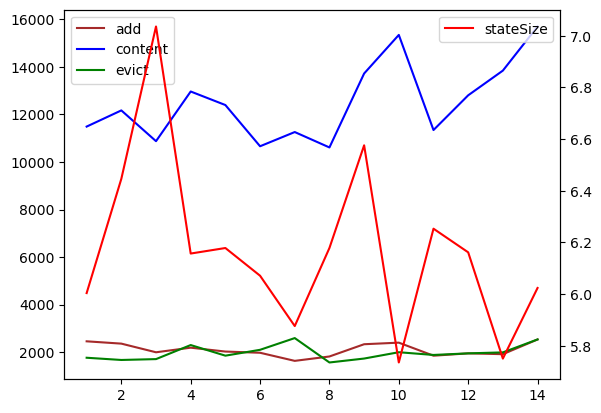

In [136]:
mean_add = result['add'].mean()
mean_add.index = np.arange(1,len(mean_add)+1)

mean_content = result['content'].mean()
mean_content.index = np.arange(1,len(mean_content)+1)

mean_evict = result['evict'].mean()
mean_evict.index = np.arange(1,len(mean_evict)+1)

mean_state = result['stateSize'].mean()
mean_state.index = np.arange(1,len(mean_state)+1)


_, ax = plt.subplots()

# result['stateSize'].boxplot(showfliers=False, secondary_y=True, ax=ax)

mean_add.plot(ax=ax,  color='brown')
mean_content.plot(ax=ax,  color='blue')
mean_evict.plot(ax=ax, color='green')
plt.legend(['add', 'content','evict'])
mean_state.plot(ax=ax,  secondary_y=True, color='red')

plt.legend(['stateSize'])

plt.savefig('SUMtests.png')
plt.show()


In [166]:
df = metrics_list[0]
df = df.drop(result.index[0])

<AxesSubplot: xlabel='stateSize'>

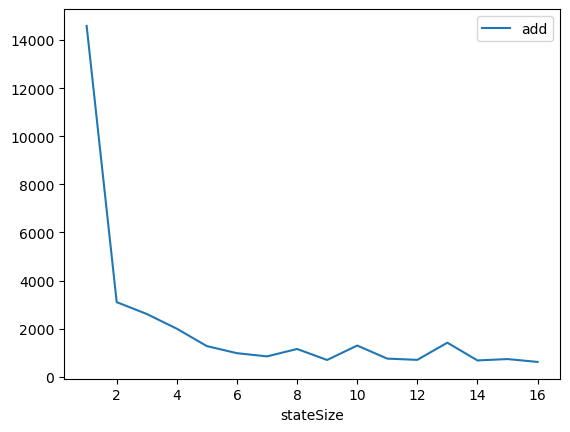

In [167]:
df[['stateSize','add']].groupby("stateSize").mean().plot()

In [168]:
result2 = pd.concat(ms)

In [170]:
result2

,add,content,evict,stateSize
0,529167,5963667,30250,1
1,10875,65209,6625,1
2,7375,23333,4291,1
3,4083,16083,3667,1
4,3417,14167,8459,1
...,...,...,...,...
9995,2625,8292,792,7
9996,875,7792,583,7
9997,875,5792,541,7
9998,667,2167,375,3


<AxesSubplot: xlabel='stateSize'>

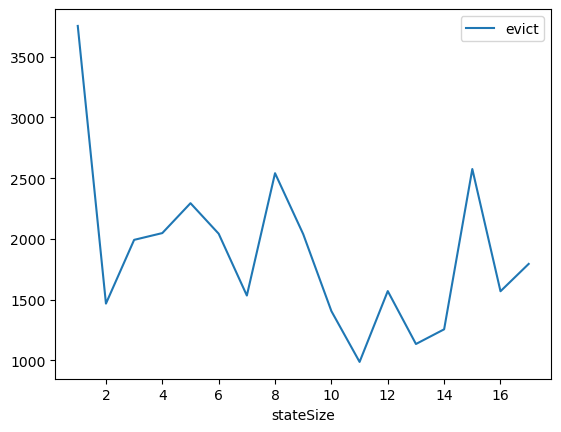

In [ ]:
result2[['stateSize','evict']].groupby("stateSize").mean().plot()

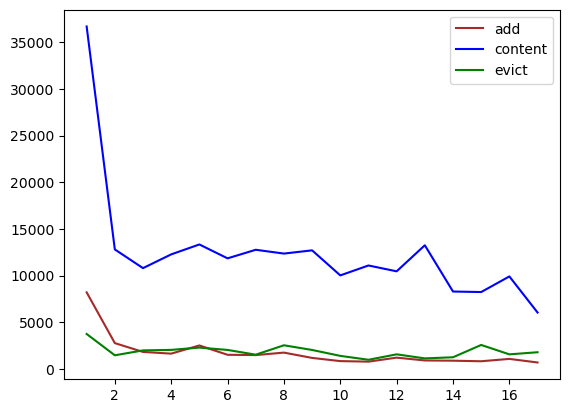

In [175]:
mean_add = result2[['stateSize','add']].groupby("stateSize").mean()
mean_add.index = np.arange(1,len(mean_add)+1)

mean_content = result2[['stateSize','content']].groupby("stateSize").mean()
mean_content.index = np.arange(1,len(mean_content)+1)

mean_evict = result2[['stateSize','evict']].groupby("stateSize").mean()
mean_evict.index = np.arange(1,len(mean_evict)+1)

_, ax = plt.subplots()

# result['stateSize'].boxplot(showfliers=False, secondary_y=True, ax=ax)

mean_add.plot(ax=ax,  color='brown')
mean_content.plot(ax=ax,  color='blue')
mean_evict.plot(ax=ax, color='green')
plt.legend(['add', 'content','evict'])

# mean_state.plot(ax=ax,  secondary_y=True, color='red')

# plt.legend(['stateSize'])

# plt.savefig('SUMtests.png')
plt.show()
